In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows=10
pd.options.display.max_columns=6

In [80]:
class PCA_class:

    def __init__(self, datafile, IDs = []):
        self.data = pd.read_csv(datafile)
        self.IDs = IDs
        self.IDdf = self.data.filter(IDs)
        self.nonIDdf = pd.DataFrame(self.data.drop(self.IDs, axis=1))
        
    def analysis(self, n_components = []):
        self.pca = PCA(n_components)
        self.pComps = self.pca.fit_transform(self.nonIDdf)
        self.evr = self.pca.explained_variance_ratio_
        
    def scree(self):
        plt.plot(np.cumsum(self.evr))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.show()

    def df_create(self, num_pcs = []):
        
        def prepend(list, str): 
            str += '{0}'
            list = [str.format(i) for i in list] 
            return(list) 
        
        self.rangemax = num_pcs+1
        self.pclist = list(range(1,self.rangemax))
        self.pcstr = "PC"
        self.pccols = prepend(self.pclist, self.pcstr)
        self.pCompsdf = pd.DataFrame(data = self.pComps, columns = self.pccols)
        self.concatlist = [self.IDdf, self.pCompsdf]
        self.pcadf = pd.concat(self.concatlist, axis=1)
        
    def scale(self, scaler):
        self.scaler = scaler
        self.scaled_pCompsdf = pd.DataFrame(self.scaler.fit_transform(self.pCompsdf))
        self.scaled_concatlist = [self.IDdf, self.scaled_pCompsdf]
        self.scaled_pcadf = pd.concat(self.scaled_concatlist, axis=1)
        self.scaled_pcadf.columns = self.pcadf.columns

In [82]:
pca = PCA_class("SCALED_NONAN_DATA.csv", IDs = ['labvisitid', 'presence'])
pca.analysis(n_components=.95)
pca.df_create(num_pcs=113)
pca.scale(MinMaxScaler())
pca.scaled_pcadf
pca.scaled_pcadf.to_csv("SCALED_PCA_DATA.csv", index=False)

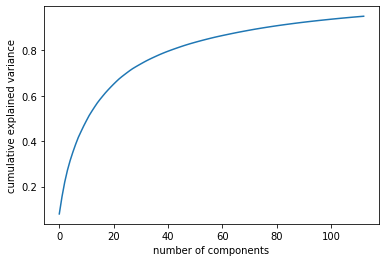

In [59]:
pca.scree()